# Otto商品分类——Logistic 回归

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dpath = './data/'
train = pd.read_csv(dpath +"Otto_FE_train_org.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.018182,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
3,4,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,...,0.000000,0.015385,0.029851,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.018182,0.000000,0.000000,0.0,0.0,0.007692,0.0,0.0,0.0,Class_1


In [3]:
y_train = train['target']   
X_train = train.drop(["id", "target"], axis=1)

# 保存特征名字以备后用（可视化）
feat_names_org = X_train.columns 

from scipy.sparse import csr_matrix

X_train = csr_matrix(X_train)  # sklearn的学习器大多支持稀疏数据输入，模型训练会快很多

## 默认参数的Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
loss = cross_val_score(lr, X_train, y_train, cv=3, scoring='neg_log_loss')
print('logloss of each fold is: ', -loss)
print('mean cv logloss is:', -loss.mean())

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logisti

logloss of each fold is:  [0.79764026 0.79738585 0.79737362]
mean cv logloss is: 0.7974665740063602


## Logistic Regression + GridSearchCV
logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 目标函数为：J = C* sum(logloss(f(xi), yi)) + penalty

在sklearn框架下，不同学习器的参数调整步骤相同：

设置参数搜索范围

生成学习器实例（参数设置）

生成GridSearchCV的实例（参数设置）

调用GridSearchCV的fit方法

In [6]:
# 为了比较 GridSearchCV 和 LogisticRegressionCV，两者用相同的交叉验证数据分割
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=666)

In [7]:
from sklearn.model_selection import GridSearchCV

penaltys = ['l1', 'l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(penalty = penaltys, C = Cs)

lr = LogisticRegression(solver='liblinear')

grid = GridSearchCV(lr, param_grid, cv=fold, scoring='neg_log_loss', n_jobs=4, return_train_score=True)

grid.fit(X_train, y_train)

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=666, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_log_loss', verbose=0)

In [8]:
grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
grid.best_params_

{'C': 100, 'penalty': 'l1'}

In [11]:
-grid.best_score_

0.6717109852451912

In [12]:
grid.cv_results_

{'mean_fit_time': array([ 0.60571345,  0.98835627,  0.85237805,  1.30650496,  1.58509374,
         2.15290705,  2.01960826,  3.10235715,  2.22936002,  4.79384486,
         2.34539262,  7.60233307,  2.45443583, 10.69044503]),
 'std_fit_time': array([0.01353685, 0.01232311, 0.0103012 , 0.01763465, 0.03065715,
        0.03394375, 0.08958066, 0.00170318, 0.05804421, 0.06856498,
        0.04144663, 0.10568589, 0.06479566, 0.54001672]),
 'mean_score_time': array([0.11103559, 0.11735423, 0.13197875, 0.11668992, 0.10870949,
        0.13164814, 0.11401884, 0.12267256, 0.12566455, 0.1253322 ,
        0.10638197, 0.11369554, 0.13264585, 0.11368267]),
 'std_score_time': array([0.0174144 , 0.01005108, 0.0195492 , 0.01205042, 0.01391461,
        0.00814393, 0.01185615, 0.01634891, 0.00785352, 0.01547982,
        0.00248665, 0.00570124, 0.01310492, 0.01769051]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              ma

In [13]:
mean_test_score = grid.cv_results_['mean_test_score']
std_test_score = grid.cv_results_['std_test_score']

mean_train_score = grid.cv_results_['mean_train_score']
std_train_score = grid.cv_results_['std_train_score']

n_Cs = len(Cs)
n_penaltys = len(penaltys)

test_scores = mean_test_score.reshape(n_Cs, n_penaltys)
train_scores = mean_train_score.reshape(n_Cs, n_penaltys)
test_stds = std_test_score.reshape(n_Cs, n_penaltys)
train_stds = std_train_score.reshape(n_Cs, n_penaltys)

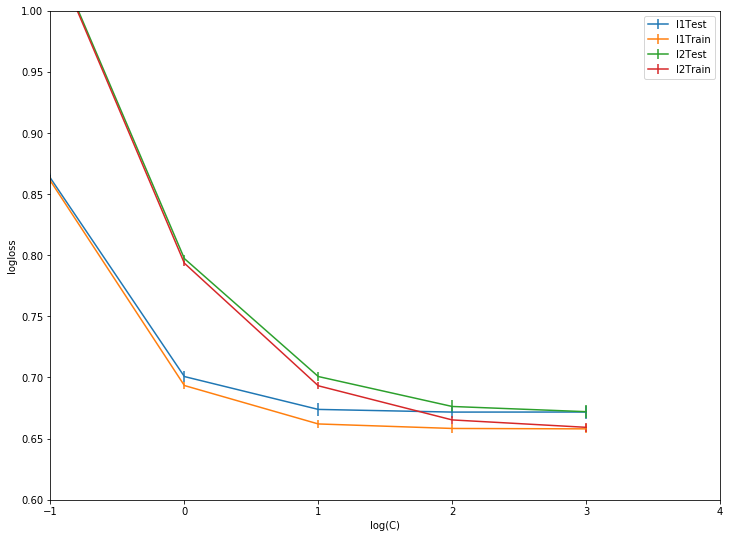

In [15]:
plt.figure(figsize=(12, 9))

x_axis = np.log10(Cs)
for i in range(n_penaltys):
    plt.errorbar(x_axis, -test_scores[:, i], yerr=test_stds[:, i], label=penaltys[i] + 'Test')
    plt.errorbar(x_axis, -train_scores[:, i], yerr=train_stds[:, i], label=penaltys[i] + 'Train')
    
plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('logloss')
plt.axis([-1, 4, 0.6, 1.0])
plt.show()

In [16]:
import pickle

pickle.dump(grid.best_estimator_, open("Otto_L1_org_lr_and_grid.pkl", 'wb'))

## LogisticRegressionCV

In [20]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

# 大量样本（6W+）、高维度（93），L1正则 --> 可选用saga优化求解器
# LogisticRegressionCV 比 GridSearchCV 快
lrcv = LogisticRegressionCV(Cs=Cs, cv=fold, scoring='neg_log_loss', penalty='l1', solver='liblinear', 
                             multi_class='ovr', n_jobs=-1)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], class_weight=None,
                     cv=StratifiedKFold(n_splits=3, random_state=666, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='ovr', n_jobs=-1,
                     penalty='l1', random_state=None, refit=True,
                     scoring='neg_log_loss', solver='liblinear', tol=0.0001,
                     verbose=0)

In [21]:
lrcv.scores_

{'Class_1': array([[-0.14540941, -0.13888326, -0.10927772, -0.08614724, -0.08266708,
         -0.08255354, -0.08254852],
        [-0.14541674, -0.13889331, -0.11088573, -0.08621938, -0.0838848 ,
         -0.08403835, -0.08406948],
        [-0.14542407, -0.13890327, -0.11042757, -0.087133  , -0.08538942,
         -0.08571134, -0.08575832]]),
 'Class_2': array([[-0.57507308, -0.45011152, -0.34855959, -0.3197611 , -0.31704966,
         -0.3170371 , -0.31704243],
        [-0.5750947 , -0.45026754, -0.34940244, -0.32252659, -0.31928555,
         -0.31923863, -0.31924229],
        [-0.57511632, -0.44986128, -0.34743996, -0.31901388, -0.31744454,
         -0.3176095 , -0.3176295 ]]),
 'Class_3': array([[-0.38749796, -0.34518835, -0.28478051, -0.26733148, -0.26498239,
         -0.26495836, -0.26495968],
        [-0.38751797, -0.34667748, -0.28358925, -0.2646472 , -0.26322801,
         -0.26348834, -0.26353416],
        [-0.38753799, -0.34489294, -0.2851527 , -0.26600111, -0.26347497,
         

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [22]:
lrcv.scores_['Class_1']

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[-0.14540941, -0.13888326, -0.10927772, -0.08614724, -0.08266708,
        -0.08255354, -0.08254852],
       [-0.14541674, -0.13889331, -0.11088573, -0.08621938, -0.0838848 ,
        -0.08403835, -0.08406948],
       [-0.14542407, -0.13890327, -0.11042757, -0.087133  , -0.08538942,
        -0.08571134, -0.08575832]])

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [23]:
n_Cs = len(Cs)
n_classes = 9

scores =  np.zeros((n_classes, n_Cs))

for j in range(n_classes):
    scores[j, :] = np.mean(lrcv.scores_['Class_'+ str(j+1)], axis = 0)
    
scores

array([[-0.14541674, -0.13889328, -0.11019701, -0.08649988, -0.08398044,
        -0.08410108, -0.08412544],
       [-0.5750947 , -0.45008011, -0.34846733, -0.32043386, -0.31792658,
        -0.31796174, -0.31797141],
       [-0.38751797, -0.34558626, -0.28450749, -0.26599326, -0.26389512,
        -0.26392447, -0.2639383 ],
       [-0.18416452, -0.17894572, -0.14648053, -0.13079188, -0.12794993,
        -0.12800116, -0.12803483],
       [-0.18649002, -0.08089672, -0.04068844, -0.02145545, -0.01548236,
        -0.01476176, -0.01500467],
       [-0.53896734, -0.22368636, -0.1343006 , -0.1116077 , -0.11029954,
        -0.11045582, -0.11047627],
       [-0.19129479, -0.17387537, -0.12651788, -0.1057141 , -0.10363901,
        -0.10372478, -0.10374442],
       [-0.40135535, -0.3002919 , -0.13500365, -0.10592222, -0.10402674,
        -0.10416512, -0.104186  ],
       [-0.28234674, -0.22282005, -0.11683838, -0.09305958, -0.09031752,
        -0.09047051, -0.09050336]])

In [25]:
scores.shape

(9, 7)

In [26]:
logloss_mean = -np.mean(scores, axis = 0)
logloss_mean

array([0.32140535, 0.23500842, 0.16033348, 0.13794199, 0.13527969,
       0.13528516, 0.13533163])

In [27]:
best_C = np.argmin(logloss_mean)
best_score = np.min(logloss_mean)
print('best_C:', Cs[best_C])
print('best_score:', best_score)

best_C: 10
best_score: 0.13527969390382064


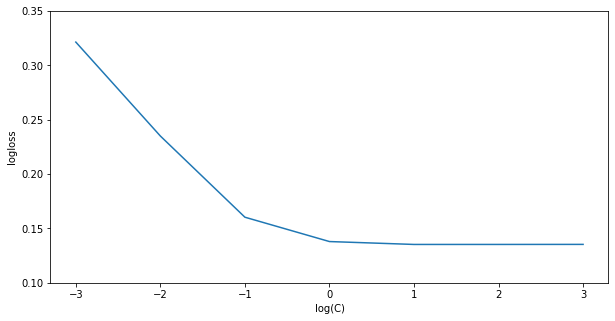

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(Cs), logloss_mean.reshape(n_Cs, 1)) 
plt.xlabel('log(C)')
plt.ylabel('logloss')
plt.ylim(0.1, 0.35)

plt.show()

In [29]:
# 保存模型，用于后续测试
import pickle

pickle.dump(grid.best_estimator_, open("Otto_L1_org_lrcv.pkl", 'wb'))